# **Task:**
---

1. Implement the three methods (standard, dynamic, powering) for Fibonacci numbers and compare the time complexity.
2. Implement backtracking for a simple puzzle of your choice.

# **Libraries:**
---

In [1]:
import math
import time
import matplotlib.pyplot as plt

# **Task-1: Implementing the three methods (standard, dynamic, powering) for Fibonacci numbers and comparing the time complexity:**
---

## 1.1 Standard (naïve recursive) method:

The standard method directly implements the Fibonacci recurrence defined as:  
- $F_0 = 0$  
- $F_1 = 1$  
- $F_n = F_{n-1} + F_{n-2}$ for $n ≥ 2$

This recursive implementation computes the $n$th Fibonacci number by recursing into the two previous terms without storing intermediate results.

The number of recursive calls grows roughly as $O(\phi^n)$, where $\phi ≈ 1.618$ is the golden ratio.

This exponential growth makes the standard method inefficient for large $n$.
 
`fibo_standard(n):` This function checks for the base cases ($n = 0$ and $n = 1$) and recursively calls itself to calculate $F_{n-1}$ and $F_{n-2}$, adding these values to obtain $F_n$.

In [25]:
def fibo_standard(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibo_standard(n-1) + fibo_standard(n-2)

In [26]:
n=10
result_standard = fibo_standard(n)
print(f"Standard (recursive) method: F({n})={result_standard}")

Standard (recursive) method: F(10)=55


## 1.2 Dynamic Programming method using memoization:

The dynamic programming method uses memoization to avoid recalculating results for sub-problems. It leverages the same recurrence relation as the standard method but stores already computed Fibonacci numbers in an array (or list) named `known`.

Since each Fibonacci number from $0$ to $n$ is computed only once and then re-used, the overall time complexity becomes $O(n)$.

`fibo_dynamic(n):` This function initializes a list `known` of size $(n+1)$ with default values (e.g., $-1$) except for the base cases ($F_0$ and $F_1$). A nested recursive function checks if a Fibonacci number has already been computed; if not, it computes and stores the value in `known`.


In [27]:
def fibo_dynamic(n):
    known = [-1] * (n + 1)
    known[0] = 0
    if n >= 1:
        known[1] = 1

    def fibo(n):
        if known[n] != -1:
            return known[n]
        known[n] = fibo(n-1) + fibo(n-2)
        return known[n]

    return fibo(n)

In [28]:
n=10
result_dynamic = fibo_dynamic(n)
print(f"Dynamic Programming method: F({n})={result_dynamic}")

Dynamic Programming method: F(10)=55


## 1.3 Powering method using matrix exponentiation:

This method is based on the matrix representation of Fibonacci numbers using the identity:  
- $M = \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix}$  
- It is known that:  
  $M^{(n-1)} = \begin{pmatrix} F_{n} & F_{n-1} \\ F_{n-1} & F_{n-2} \end{pmatrix}$  
Thus, the $n$th Fibonacci number can be obtained as the element in the top-left of $M^{(n-1)}$.

Using a divide-and-conquer approach for matrix exponentiation, the number of matrix multiplications is reduced to $O(\log n)$.
 
- `mul(A, B):` This helper function multiplies two $2×2$ matrices $A$ and $B$.  
- `pow_mat(a, n):` Recursively computes the $n$th power of a matrix using the idea of dividing the power by $2$ (if even) or multiplying one extra matrix when the power is odd.  
- `fibo_powering(n):` This function uses `pow_mat` to compute $M^{(n-1)}$ and returns the element at position $[0][0]$, corresponding to $F_n$.


In [29]:
def mul(A, B):
    return [
        [A[0][0]*B[0][0] + A[0][1]*B[1][0],
         A[0][0]*B[0][1] + A[0][1]*B[1][1]],
        [A[1][0]*B[0][0] + A[1][1]*B[1][0],
         A[1][0]*B[0][1] + A[1][1]*B[1][1]]
    ]


def pow_mat(a, n):
    if n == 0:
        return [[1, 0], [0, 1]]
    b = mul(a, a)
    c = pow_mat(b, n // 2)
    if n % 2 == 0:
        return c
    else:
        return mul(a, c)

def fibo_powering(n):
    if n == 0:
        return 0
    M = [[1, 1],
         [1, 0]]
    M_powered = pow_mat(M, n - 1)
    return M_powered[0][0]

In [30]:
n=10
result_powering = fibo_powering(n)
print(f"powering (matrix exponentiation) method: F({n})={result_powering}")

powering (matrix exponentiation) method: F(10)=55


## 1.4 Comparing time compexity of these 3 methods:

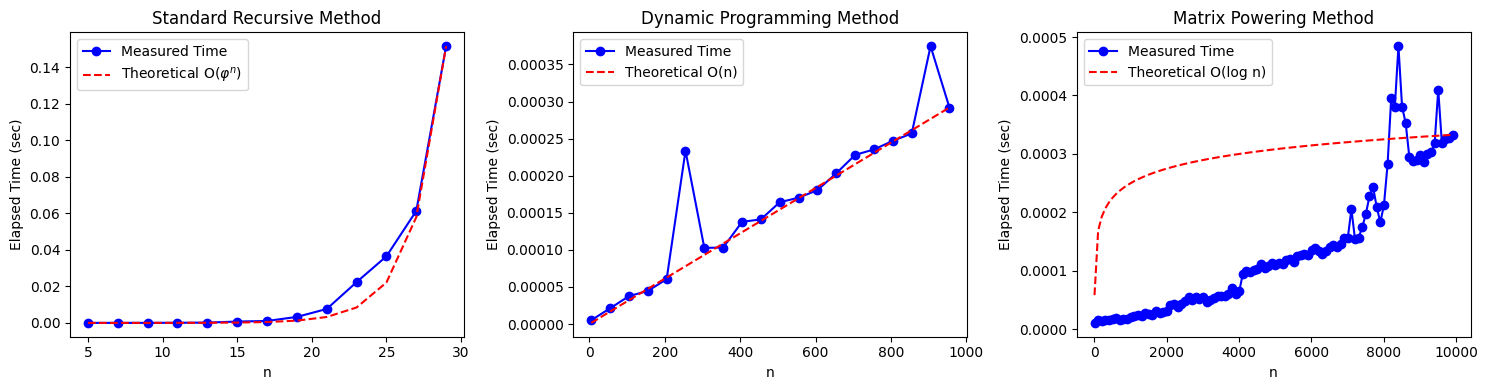

In [54]:
def measure_time(func, n):
    start = time.perf_counter()
    func(n)
    end = time.perf_counter()
    return end - start

n_values_standard = list(range(5, 31, 2))

n_values_dynamic = list(range(5, 1001, 50))

n_values_powering = list(range(5, 10001, 100))

times_standard = [measure_time(fibo_standard, n) for n in n_values_standard]
times_dynamic  = [measure_time(fibo_dynamic, n) for n in n_values_dynamic]
times_powering = [measure_time(fibo_powering, n) for n in n_values_powering]

phi = (1 + math.sqrt(5)) / 2  

factor_standard = times_standard[-1] / (phi ** n_values_standard[-1])
theo_standard = [factor_standard * (phi ** n) for n in n_values_standard]

factor_dynamic = times_dynamic[-1] / n_values_dynamic[-1]
theo_dynamic = [factor_dynamic * n for n in n_values_dynamic]

factor_powering = times_powering[-1] / math.log(n_values_powering[-1])
theo_powering = [factor_powering * math.log(n) for n in n_values_powering]

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(n_values_standard, times_standard, 'bo-', label='Measured Time')
plt.plot(n_values_standard, theo_standard, 'r--', label='Theoretical O($φ^n$)')
plt.xlabel('n')
plt.ylabel('Elapsed Time (sec)')
plt.title('Standard Recursive Method')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(n_values_dynamic, times_dynamic, 'bo-', label='Measured Time')
plt.plot(n_values_dynamic, theo_dynamic, 'r--', label='Theoretical O(n)')
plt.xlabel('n')
plt.ylabel('Elapsed Time (sec)')
plt.title('Dynamic Programming Method')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(n_values_powering, times_powering, 'bo-', label='Measured Time')
plt.plot(n_values_powering, theo_powering, 'r--', label='Theoretical O(log n)')
plt.xlabel('n')
plt.ylabel('Elapsed Time (sec)')
plt.title('Matrix Powering Method')
plt.legend()

plt.tight_layout()
plt.show()

1. **Standard Recursive Method:**  
   - *Theoretical model:* $O(\phi^n)$  
   - *Observation:* The measured times follow an exponential growth curve, matching the exponential time complexity, albeit practical tests are limited to small $n$ due to rapidly increasing computation times.

2. **Dynamic Programming Method:**  
   - *Theoretical model:* $O(n)$  
   - *Observation:* Both measured and theoretical times show a linear trend, confirming the efficient linear performance of this approach.

3. **Matrix Powering Method:**  
   - *Theoretical model:* $O(\log n)$  
   - *Observation:* While the measured timings do indicate very fast performance, the experimental curve does not match the theoretical logarithmic curve as closely as the other two methods. This discrepancy could be due to implementation details or measurement limitations. Nonetheless, the matrix powering method demonstrates superior speed for large $n$.


# **Task-2: Implementaing Backtracking to solve Sudoku puzzle:**
---

Backtracking is used in Sudoku to fill the empty cells one by one, trying all digits from 1 to 9 at each step. If a digit satisfies the Sudoku constraints—no repetition in the row, column, or 3×3 subgrid—it is placed, and the algorithm proceeds recursively to the next empty cell.

If a conflict is found later, the algorithm **backtracks**: it removes the last inserted digit and tries the next possible option. This continues until the puzzle is solved or no solution exists.

### Key Functions as implemented below:
- `find_empty(board)`: Locates the next empty cell (value 0).
- `is_valid(board, num, pos)`: Checks if placing `num` at `pos` is allowed.
- `solve_sudoku(board)`: Recursively attempts to fill the board using backtracking. Resets cells on failure and tries other options.

This approach prunes invalid paths early and explores only valid configurations, efficiently solving the Sudoku by leveraging the structured nature of its solution space.


In [60]:
def print_board(board):
    for i in range(len(board)):
        if i % 3 == 0 and i != 0:
            print("-" * 21)
        for j in range(len(board[0])):
            if j % 3 == 0 and j != 0:
                print("| ", end="")
            if j == 8:
                print(board[i][j])
            else:
                print(str(board[i][j]) + " ", end="")

def find_empty(board):
    for r in range(len(board)):
        for c in range(len(board[0])):
            if board[r][c] == 0:
                return (r, c)
    return None

def is_valid(board, num, pos):
    r, c = pos

    for col in range(len(board[0])):
        if board[r][col] == num and col != c:
            return False

    for row in range(len(board)):
        if board[row][c] == num and row != r:
            return False

    sub_r = (r // 3) * 3
    sub_c = (c // 3) * 3
    for i in range(sub_r, sub_r + 3):
        for j in range(sub_c, sub_c + 3):
            if board[i][j] == num and (i, j) != pos:
                return False
    return True

def solve_sudoku(board):
    empty = find_empty(board)
    if not empty:
        return True
    row, col = empty

    for num in range(1, 10):
        if is_valid(board, num, (row, col)):
            board[row][col] = num
            if solve_sudoku(board):
                return True
            board[row][col] = 0
    return False

if __name__ == "__main__":

    sudoku_board = [
        [5, 1, 7, 6, 0, 0, 0, 3, 4],
        [2, 8, 9, 0, 0, 4, 0, 0, 0],
        [3, 4, 6, 2, 0, 5, 0, 9, 0],
        [6, 0, 2, 0, 0, 0, 0, 1, 0],
        [0, 3, 8, 0, 0, 6, 0, 4, 7],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 9, 0, 0, 0, 0, 0, 7, 8],
        [7, 0, 3, 4, 0, 0, 5, 6, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
    
    print("Initial Sudoku Puzzle:")
    print_board(sudoku_board)
    
    if solve_sudoku(sudoku_board):
        print("\n\nSolved Sudoku Puzzle:")
        print_board(sudoku_board)
    else:
        print("No solution exists for the given puzzle.")


Initial Sudoku Puzzle:
5 1 7 | 6 0 0 | 0 3 4
2 8 9 | 0 0 4 | 0 0 0
3 4 6 | 2 0 5 | 0 9 0
---------------------
6 0 2 | 0 0 0 | 0 1 0
0 3 8 | 0 0 6 | 0 4 7
0 0 0 | 0 0 0 | 0 0 0
---------------------
0 9 0 | 0 0 0 | 0 7 8
7 0 3 | 4 0 0 | 5 6 0
0 0 0 | 0 0 0 | 0 0 0


Solved Sudoku Puzzle:
5 1 7 | 6 9 8 | 2 3 4
2 8 9 | 1 3 4 | 7 5 6
3 4 6 | 2 7 5 | 8 9 1
---------------------
6 7 2 | 8 4 9 | 3 1 5
1 3 8 | 5 2 6 | 9 4 7
9 5 4 | 7 1 3 | 6 8 2
---------------------
4 9 5 | 3 6 2 | 1 7 8
7 2 3 | 4 8 1 | 5 6 9
8 6 1 | 9 5 7 | 4 2 3
